In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
# Read the dataset

In [2]:
weather = pd.read_csv("jfk_airport.csv", index_col="DATE")

In [3]:
weather

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1/1/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.38,1545.0,1532.0,0.00,0.0,0.0,39.0,46,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/2/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.61,1826.0,1837.0,0.00,0.0,0.0,46.0,54,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/3/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",3.13,1045.0,934.0,0.00,0.0,0.0,53.0,60,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1/4/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.54,1841.0,1840.0,0.62,0.0,0.0,51.0,55,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1/5/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,851.0,858.0,0.04,0.0,0.0,38.0,47,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/22/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",19.24,NaN,NaN,0.28,0.0,0.0,42.0,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/23/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.34,NaN,NaN,0.01,0.0,0.0,44.0,53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11/24/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",16.55,NaN,NaN,0.00,0.0,0.0,51.0,56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
AWND       0.003188
FMTM       0.528636
PGTM       0.547103
PRCP       0.000000
SNOW       0.000000
SNWD       0.000440
TAVG       0.308124
TMAX       0.000000
TMIN       0.000000
TSUN       0.996812
WDF2       0.003188
WDF5       0.012312
WESD       0.558316
WSF2       0.003188
WSF5       0.012312
WT01       0.644608
WT02       0.948554
WT03       0.928658
WT04       0.985270
WT05       0.960976
WT06       0.992635
WT07       0.988128
WT08       0.904584
WT09       0.990656
WT11       0.998571
WT13       0.815654
WT14       0.963944
WT15       0.998241
WT16       0.776080
WT17       0.997362
WT18       0.959437
WT19       0.999890
WT21       0.999560
WT22       0.995273
WV01       0.999890
dtype: float64

In [5]:
valid_columns = weather.columns[null_pct < .02]

In [6]:
valid_columns

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN',
       'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

In [7]:
weather = weather[valid_columns].copy()

In [8]:
weather.columns = weather.columns.str.lower()

In [9]:
weather

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,,,,,
1/1/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.38,0.00,0.0,0.0,46,31,180.0,170.0,15.0,17.0
1/2/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.61,0.00,0.0,0.0,54,37,180.0,180.0,21.0,23.9
1/3/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",3.13,0.00,0.0,0.0,60,46,230.0,240.0,10.1,13.0
1/4/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.54,0.62,0.0,0.0,55,47,210.0,210.0,31.1,40.0
1/5/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,0.04,0.0,0.0,47,28,320.0,300.0,28.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11/22/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",19.24,0.28,0.0,0.0,44,38,250.0,250.0,36.0,47.0
11/23/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.34,0.01,0.0,0.0,53,37,300.0,300.0,36.0,51.0
11/24/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",16.55,0.00,0.0,0.0,56,46,300.0,290.0,28.0,36.9


In [10]:
weather.drop_duplicates()

,station,name,awnd,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,,,,,
1/1/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.38,0.00,0.0,0.0,46,31,180.0,170.0,15.0,17.0
1/2/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",7.61,0.00,0.0,0.0,54,37,180.0,180.0,21.0,23.9
1/3/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",3.13,0.00,0.0,0.0,60,46,230.0,240.0,10.1,13.0
1/4/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",14.54,0.62,0.0,0.0,55,47,210.0,210.0,31.1,40.0
1/5/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,0.04,0.0,0.0,47,28,320.0,300.0,28.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11/22/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",19.24,0.28,0.0,0.0,44,38,250.0,250.0,36.0,47.0
11/23/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.34,0.01,0.0,0.0,53,37,300.0,300.0,36.0,51.0
11/24/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",16.55,0.00,0.0,0.0,56,46,300.0,290.0,28.0,36.9


In [11]:
# columns_to_drop = ['wdf2', 'wdf5', 'wsf2', 'wsf5']  # Replace these with the actual column names
# weather = weather.drop(columns=columns_to_drop)
columns_to_drop = ['awnd'] 
weather = weather.drop(columns=columns_to_drop)

In [12]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,,,,
1/1/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,46,31,180.0,170.0,15.0,17.0
1/2/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,54,37,180.0,180.0,21.0,23.9
1/3/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,46,230.0,240.0,10.1,13.0
1/4/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.62,0.0,0.0,55,47,210.0,210.0,31.1,40.0
1/5/2000,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.04,0.0,0.0,47,28,320.0,300.0,28.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
11/22/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.28,0.0,0.0,44,38,250.0,250.0,36.0,47.0
11/23/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,53,37,300.0,300.0,36.0,51.0
11/24/2024,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,46,300.0,290.0,28.0,36.9


In [13]:
weather = weather.ffill()

In [14]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
wdf2       0
wdf5       0
wsf2       0
wsf5       0
dtype: int64

In [15]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
wdf2       float64
wdf5       float64
wsf2       float64
wsf5       float64
dtype: object

In [16]:
weather.index

Index(['1/1/2000', '1/2/2000', '1/3/2000', '1/4/2000', '1/5/2000', '1/6/2000',
       '1/7/2000', '1/8/2000', '1/9/2000', '1/10/2000',
       ...
       '11/17/2024', '11/18/2024', '11/19/2024', '11/20/2024', '11/21/2024',
       '11/22/2024', '11/23/2024', '11/24/2024', '11/25/2024', '11/26/2024'],
      dtype='object', name='DATE', length=9097)

In [17]:
weather.index = pd.to_datetime(weather.index)

In [18]:
weather.index.year.value_counts().sort_index()

DATE
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    331
Name: count, dtype: int64

In [ ]:
# Make some visualization with the data

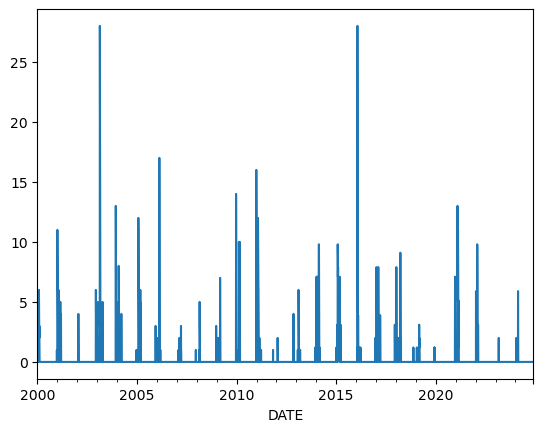

In [19]:
weather["snwd"].plot()
plt.savefig('graph.png', dpi=1000)

In [20]:
weather["target"] = weather.shift(-1)["tmax"]

In [21]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
DATE,,,,,,,,,,,,
2000-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,46,31,180.0,170.0,15.0,17.0,54.0
2000-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,54,37,180.0,180.0,21.0,23.9,60.0
2000-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,46,230.0,240.0,10.1,13.0,55.0
2000-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.62,0.0,0.0,55,47,210.0,210.0,31.1,40.0,47.0
2000-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.04,0.0,0.0,47,28,320.0,300.0,28.0,40.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.28,0.0,0.0,44,38,250.0,250.0,36.0,47.0,53.0
2024-11-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,53,37,300.0,300.0,36.0,51.0,56.0
2024-11-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,46,300.0,290.0,28.0,36.9,55.0


In [22]:
weather = weather.ffill()
weather

,station,name,prcp,snow,snwd,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
DATE,,,,,,,,,,,,
2000-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,46,31,180.0,170.0,15.0,17.0,54.0
2000-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,54,37,180.0,180.0,21.0,23.9,60.0
2000-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,60,46,230.0,240.0,10.1,13.0,55.0
2000-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.62,0.0,0.0,55,47,210.0,210.0,31.1,40.0,47.0
2000-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.04,0.0,0.0,47,28,320.0,300.0,28.0,40.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.28,0.0,0.0,44,38,250.0,250.0,36.0,47.0,53.0
2024-11-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,53,37,300.0,300.0,36.0,51.0,56.0
2024-11-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,46,300.0,290.0,28.0,36.9,55.0


In [23]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [24]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [25]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin', 'wdf2', 'wdf5', 'wsf2', 'wsf5'], dtype='object')

In [26]:
# evaluate a machine learning model's
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [27]:
predictions = backtest(weather, rr, predictors)

In [28]:
predictions

,actual,prediction,diff
DATE,,,
2009-12-29,32.0,27.142453,4.857547
2009-12-30,35.0,34.435474,0.564526
2009-12-31,41.0,41.641919,0.641919
2010-01-01,33.0,44.964440,11.964440
2010-01-02,24.0,30.290652,6.290652
...,...,...,...
2024-11-22,53.0,45.301475,7.698525
2024-11-23,56.0,48.756097,7.243903
2024-11-24,55.0,56.347334,1.347334


In [ ]:
# mean absolute error

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

4.972022151422986

In [30]:
pd.Series(rr.coef_, index=predictors)

prcp   -0.196455
snow   -0.318074
snwd    0.024762
tmax    0.508922
tmin    0.420847
wdf2   -0.002589
wdf5   -0.003625
wsf2   -0.082793
wsf5   -0.111794
dtype: float64

In [31]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [32]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [100]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,,
2000-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,16,47.0,31.333333,-0.010638,16.000000,0.000000,0.003333,-1.000000,46.000000,-0.326087,32.214286,-0.503326,0.090000,-1.000000
2000-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,22,22.0,33.666667,0.396040,17.333333,0.269231,0.000000,0.000000,45.500000,0.032967,31.142857,-0.293578,0.090000,-1.000000
2000-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,22,8,19.0,33.333333,-0.340000,15.333333,-0.478261,0.000000,0.000000,42.785714,-0.485810,28.428571,-0.718593,0.090000,-1.000000
2000-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,19,4,30.0,29.333333,-0.352273,11.333333,-0.647059,0.000000,0.000000,40.214286,-0.527531,25.357143,-0.842254,0.045714,-1.000000
2000-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,30,10,28.0,23.666667,0.267606,7.333333,0.363636,0.000000,0.000000,39.000000,-0.230769,24.071429,-0.584570,0.042857,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.28,0.0,0.0,44,38,53.0,53.333333,-0.175000,43.333333,-0.123077,0.566667,-0.505882,59.500000,-0.260504,43.214286,-0.120661,0.130714,1.142077
2024-11-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,53,37,56.0,50.666667,0.046053,38.333333,-0.034783,0.570000,-0.982456,59.214286,-0.104946,42.785714,-0.135225,0.131429,-0.923913
2024-11-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,46,55.0,51.000000,0.098039,40.333333,0.140496,0.096667,-1.000000,58.928571,-0.049697,43.357143,0.060956,0.129286,-1.000000


In [101]:
weather = weather.fillna(0)

In [102]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [103]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,16,47.0,31.333333,-0.010638,...,32.214286,-0.503326,0.090000,-1.000000,31.000000,31.00,16.000000,16.00,0.000000,0.0000
2000-01-16,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,47,22,22.0,33.666667,0.396040,...,31.142857,-0.293578,0.090000,-1.000000,39.000000,47.00,19.000000,22.00,0.000000,0.0000
2000-01-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,22,8,19.0,33.333333,-0.340000,...,28.428571,-0.718593,0.090000,-1.000000,33.333333,22.00,15.333333,8.00,0.000000,0.0000
2000-01-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,19,4,30.0,29.333333,-0.352273,...,25.357143,-0.842254,0.045714,-1.000000,29.750000,19.00,12.500000,4.00,0.000000,0.0000
2000-01-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,30,10,28.0,23.666667,0.267606,...,24.071429,-0.584570,0.042857,-1.000000,29.800000,30.00,12.000000,10.00,0.000000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.28,0.0,0.0,44,38,53.0,53.333333,-0.175000,...,43.214286,-0.120661,0.130714,1.142077,54.871968,48.36,40.625337,36.20,0.097992,0.1060
2024-11-23,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,53,37,56.0,50.666667,0.046053,...,42.785714,-0.135225,0.131429,-0.923913,54.869448,50.60,40.620458,35.64,0.097873,0.1384
2024-11-24,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,46,55.0,51.000000,0.098039,...,43.357143,0.060956,0.129286,-1.000000,54.870968,51.12,40.627688,37.28,0.097742,0.0796


In [33]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [34]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.7828318039921545

In [35]:
mean_squared_error(predictions["actual"], predictions["prediction"])

37.30368786653158

In [36]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2017-04-15,83.0,59.011946,23.988054
2022-12-23,16.0,38.493338,22.493338
2018-04-30,76.0,53.746461,22.253539
2022-02-22,69.0,47.319202,21.680798
2021-03-08,66.0,44.352515,21.647485
...,...,...,...
2014-12-13,47.0,46.993241,0.006759
2013-06-27,82.0,82.006504,0.006504
2015-11-24,51.0,50.995759,0.004241


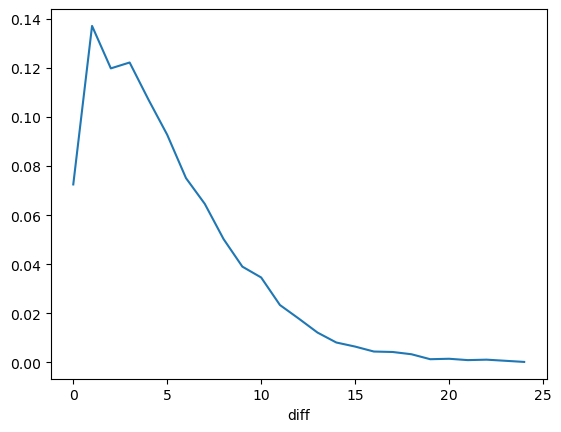

In [38]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()
plt.savefig('result.png', dpi=1000)